# Spotify Song Classifier
## Made by:

*   Sofia Cano
*   Jefferson Hernández
*   Juan Felipe Ayala





# Development

## Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import matthews_corrcoef, accuracy_score, f1_score

## Dataset Upload (See README)

In [3]:
df = pd.read_csv(r"data.csv",sep=',')

df = df.drop(df.columns[0], axis=1)
df = df.drop(columns=['song_title', 'artist'])
y = df['target'].values
df = df.drop(columns=['target'])
X = df.values

## Data pre-processing

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## K Nearest Neighbors Classifier

### Best neighbors number selection (k)

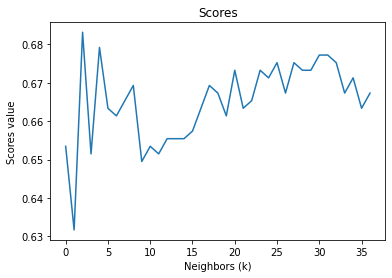

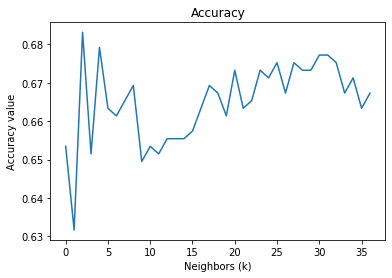

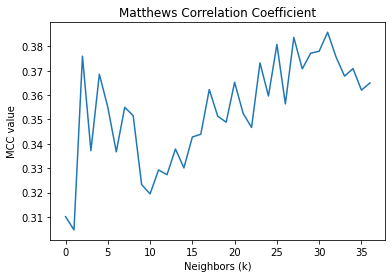

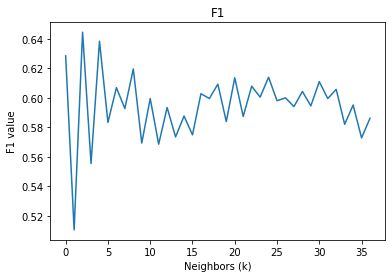

Best k by Scores: 3 . Value: 0.6831683168316832
Best k by Accuracy: 3 . Value: 0.6831683168316832
Best k by MCC: 32 . Value: 0.38579394462448086
Best k by F1: 3 . Value: 0.6444444444444445


In [18]:
k_range = range(1, int(np.sqrt(len(y_train))))

#Distances: euclidean. manhattan. chebyshev. minkowski. seuclidean. mahalanobis. hamming
distance='euclidean'

scores = []
acc = []
MCC = []
F1 = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k, weights='uniform', metric=distance, metric_params=None, algorithm='brute')
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))
  y_test_predict = knn.predict(X_test)
  acc.append(accuracy_score(y_test, y_test_predict))
  MCC.append(matthews_corrcoef(y_test, y_test_predict))
  F1.append(f1_score(y_test,y_test_predict))

plt.plot(scores)
plt.title("Scores")
plt.xlabel("Neighbors (k)")
plt.ylabel("Scores value")
plt.show()
plt.plot(acc)
plt.title("Accuracy")
plt.xlabel("Neighbors (k)")
plt.ylabel("Accuracy value")
plt.show()
plt.plot(MCC)
plt.title("Matthews Correlation Coefficient")
plt.xlabel("Neighbors (k)")
plt.ylabel("MCC value")
plt.show()
plt.plot(F1)
plt.title("F1")
plt.xlabel("Neighbors (k)")
plt.ylabel("F1 value")
plt.show()

print("Best k by Scores:",k_range[np.argmax(scores)],". Value:",scores[np.argmax(scores)])
print("Best k by Accuracy:",k_range[np.argmax(acc)],". Value:",acc[np.argmax(acc)])
print("Best k by MCC:",k_range[np.argmax(MCC)],". Value:",MCC[np.argmax(MCC)])
print("Best k by F1:",k_range[np.argmax(F1)],". Value:",F1[np.argmax(F1)])

### Algorithm.
We will use the best MCC result, as it takes into consideration every possible error type

In [13]:
n_neighbors = 32

knn = KNeighborsClassifier(n_neighbors, weights='uniform', metric=distance, metric_params=None, algorithm='auto')
knn = knn.fit(X_train, y_train)

y_predict=knn.predict(X_train)
print('Train subset')
print('Accuracy of K-NN classifier on training set: {:.5f}'
     .format(accuracy_score(y_train, y_predict)))
print('MCC of K-NN classifier on training set: {:.5f}'
     .format(matthews_corrcoef(y_train, y_predict)))

t0 = timeit.default_timer()
y_predict_knn=knn.predict(X_test)
time = timeit.default_timer() - t0
print('\nTest subset')
print('Accuracy of K-NN classifier on test set: {:.5f}'
     .format(accuracy_score(y_test, y_predict_knn)))
print('MCC of K-NN classifier on test set: {:.5f}'
     .format(matthews_corrcoef(y_test, y_predict_knn)))
print('\nClassification time: {:.5f}'.format(time),'s')

Train subset
Accuracy of K-NN classifier on training set: 0.72288
MCC of K-NN classifier on training set: 0.47598

Test subset
Accuracy of K-NN classifier on test set: 0.67723
MCC of K-NN classifier on test set: 0.38579

Classification time: 0.03899 s


## Logistic Regression Classifier

In [14]:
#Solvers: 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'

log_reg = LogisticRegression(C=0.1, random_state=1, solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

y_predict=log_reg.predict(X_train)
print('Train subset')
print('Accuracy of LR classifier on training set: {:.5f}'
     .format(accuracy_score(y_train, y_predict)))
print('MCC of LR classifier on training set: {:.5f}'
     .format(matthews_corrcoef(y_train, y_predict)))

t0 = timeit.default_timer()
y_predict_LR=log_reg.predict(X_test)
time = timeit.default_timer() - t0
print('\nTest subset')
print('Accuracy of LR classifier on test set: {:.5f}'
     .format(accuracy_score(y_test, y_predict_LR)))
print('MCC of LR classifier on test set: {:.5f}'
     .format(matthews_corrcoef(y_test, y_predict_LR)))
print('\nClassification time: {:.5f}'.format(time),'s')

Train subset
Accuracy of LR classifier on training set: 0.67593
MCC of LR classifier on training set: 0.35209

Test subset
Accuracy of LR classifier on test set: 0.65941
MCC of LR classifier on test set: 0.31938

Classification time: 0.00060 s


## Kernel-SVM classifier

In [15]:
kernels=['linear', 'poly', 'rbf', 'sigmoid']
# linear
# Kernel=0
# msv = svm.SVC(kernel=kernels[Kernel])

# cuadratic
# Kernel=1
# msv = svm.SVC(kernel=kernels[Kernel],degree=2)

# cubic
# Kernel=1
# msv = svm.SVC(kernel=kernels[Kernel],degree=3)

# rbf 
Kernel=2
msv = svm.SVC(kernel=kernels[Kernel])

msv.fit(X_train, y_train)

y_predict=msv.predict(X_train)
print('Train subset')
print('Accuracy of SVM classifier on training set: {:.5f}'
     .format(accuracy_score(y_train, y_predict)))
print('MCC of SVM classifier on training set: {:.5f}'
     .format(matthews_corrcoef(y_train, y_predict)))

t0 = timeit.default_timer()
y_predict_SVM=msv.predict(X_test)
time = timeit.default_timer() - t0
print('\nTest subset')
print('Accuracy of SVM classifier on test set: {:.5f}'
     .format(accuracy_score(y_test, y_predict_SVM)))
print('MCC of SVM classifier on test set: {:.5f}'
     .format(matthews_corrcoef(y_test, y_predict_SVM)))
print('\nClassification time: {:.5f}'.format(time),'s')

Train subset
Accuracy of SVM classifier on training set: 0.80952
MCC of SVM classifier on training set: 0.62405

Test subset
Accuracy of SVM classifier on test set: 0.73663
MCC of SVM classifier on test set: 0.47700

Classification time: 0.02062 s


## Neuronal Network Classifier

In [16]:
verbose=False

clf = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=1, max_iter=2000, verbose=verbose)

clf.fit(X_train, y_train)

y_predict=clf.predict(X_train)
print('Train subset')
print('Accuracy of ANN classifier on training set: {:.5f}'
     .format(accuracy_score(y_train, y_predict)))
print('MCC of ANN classifier on training set: {:.5f}'
     .format(matthews_corrcoef(y_train, y_predict)))

t0 = timeit.default_timer()
y_predict_ANN=clf.predict(X_test)
time = timeit.default_timer() - t0
print('\nTest subset')
print('Accuracy of ANN classifier on test set: {:.5f}'
     .format(accuracy_score(y_test, y_predict_ANN)))
print('MCC of ANN classifier on test set: {:.5f}'
     .format(matthews_corrcoef(y_test, y_predict_ANN)))
print('\nClassification time: {:.5f}'.format(time), 's')

Train subset
Accuracy of ANN classifier on training set: 0.99868
MCC of ANN classifier on training set: 0.99736

Test subset
Accuracy of ANN classifier on test set: 0.73861
MCC of ANN classifier on test set: 0.47730

Classification time: 0.00217 s
